<a href="https://colab.research.google.com/github/chetan015/deep-learning/blob/master/Assignment-05/Assignment-05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.4
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.4`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
imagefeatures = testX[:]
testX = testX.reshape((testX.shape[0], width, height, channels))
trainy = np_utils.to_categorical(y_train, 10)
testy = np_utils.to_categorical(y_test, 10)

(60000, 28, 28)


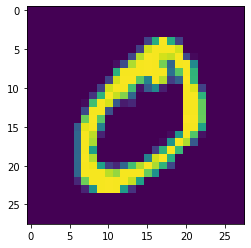

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
# # example of standardizing a image dataset
# from keras.datasets import mnist
# from keras.preprocessing.image import ImageDataGenerator
# # load dataset
# (trainX, trainy), (testX, testy) = mnist.load_data()
# # reshape dataset to have a single channel
# width, height, channels = trainX.shape[1], trainX.shape[2], 1
# trainX = trainX.reshape((trainX.shape[0], width, height, channels))
# testX = testX.reshape((testX.shape[0], width, height, channels))
# # report pixel means and standard deviations
# print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))
# # create generator that centers pixel values
# datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# # calculate the mean on the training dataset
# datagen.fit(trainX)
# print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# # demonstrate effect on a single batch of samples
# iterator = datagen.flow(trainX, trainy, batch_size=64)
# # get a batch
# batchX, batchy = iterator.next()
# # pixel stats in the batch
# print(batchX.shape, batchX.mean(), batchX.std())
# # demonstrate effect on entire training dataset
# iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)
# # get a batch
# batchX, batchy = iterator.next()
# # pixel stats in the batch
# print(batchX.shape, batchX.mean(), batchX.std())



# Statistics train=33.318 (78.567), test=33.791 (79.172)
# Data Generator mean=33.318, std=78.567
# (64, 28, 28, 1) 0.010656365 1.0107679
# (60000, 28, 28, 1) -3.4560264e-07 0.9999998

Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567
(64, 28, 28, 1) 0.02763115 1.0269848
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


In [0]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255

In [0]:
from keras.layers import Activation, BatchNormalization, MaxPooling2D, Dropout
from keras import regularizers
model = Sequential()

model.add(Convolution2D(16, (3, 3), name='conv1', input_shape=(28,28,1), use_bias=False)) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, (3, 3), name='conv2', use_bias=False)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Transition Block
model.add(Convolution2D(10, 1))
model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(16,(3,3),name='conv3',use_bias=False))  # 10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, (3, 3), name='conv4', use_bias=False)) #8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, (3, 3), name='conv5', use_bias=False)) #6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10,1))
model.add(Convolution2D(10,6,name='conv6'))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_12 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_13 (Activation)   (None, 24, 24, 16)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])



In [0]:
# Now use image data generator for train and validation, loop for 40 epochs
# Save best model only
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_iterator = datagen.flow(trainX, trainy, batch_size=128)

model_saved = ModelCheckpoint('model_weights.hdf5', save_best_only=True, monitor='val_acc', mode='max')

model_info = model.fit_generator(train_iterator, samples_per_epoch = 60000, nb_epoch = 40, 
                                 validation_data = (testX, testy), 
                                 callbacks=[model_saved, LearningRateScheduler(scheduler, verbose=1)])

468/468 [==============================] - 15s 32ms/step - loss: 0.2031 - acc: 0.9359 - val_loss: 0.0806 - val_acc: 0.9759
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
468/468 [==============================] - 6s 13ms/step - loss: 0.0663 - acc: 0.9788 - val_loss: 0.0423 - val_acc: 0.9867
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
468/468 [==============================] - 6s 13ms/step - loss: 0.0511 - acc: 0.9840 - val_loss: 0.0360 - val_acc: 0.9886
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
468/468 [==============================] - 6s 13ms/step - loss: 0.0418 - acc: 0.9864 - val_loss: 0.0385 - val_acc: 0.9881
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
468/468 [==============================] - 6s 13ms/step - loss: 0.0368 - acc: 0.9882 - val_loss: 0.0314 - val_acc: 0.9905
Epoch 6/40

Epoch 00006: LearningRateSchedule

In [0]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

In [0]:
testy[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

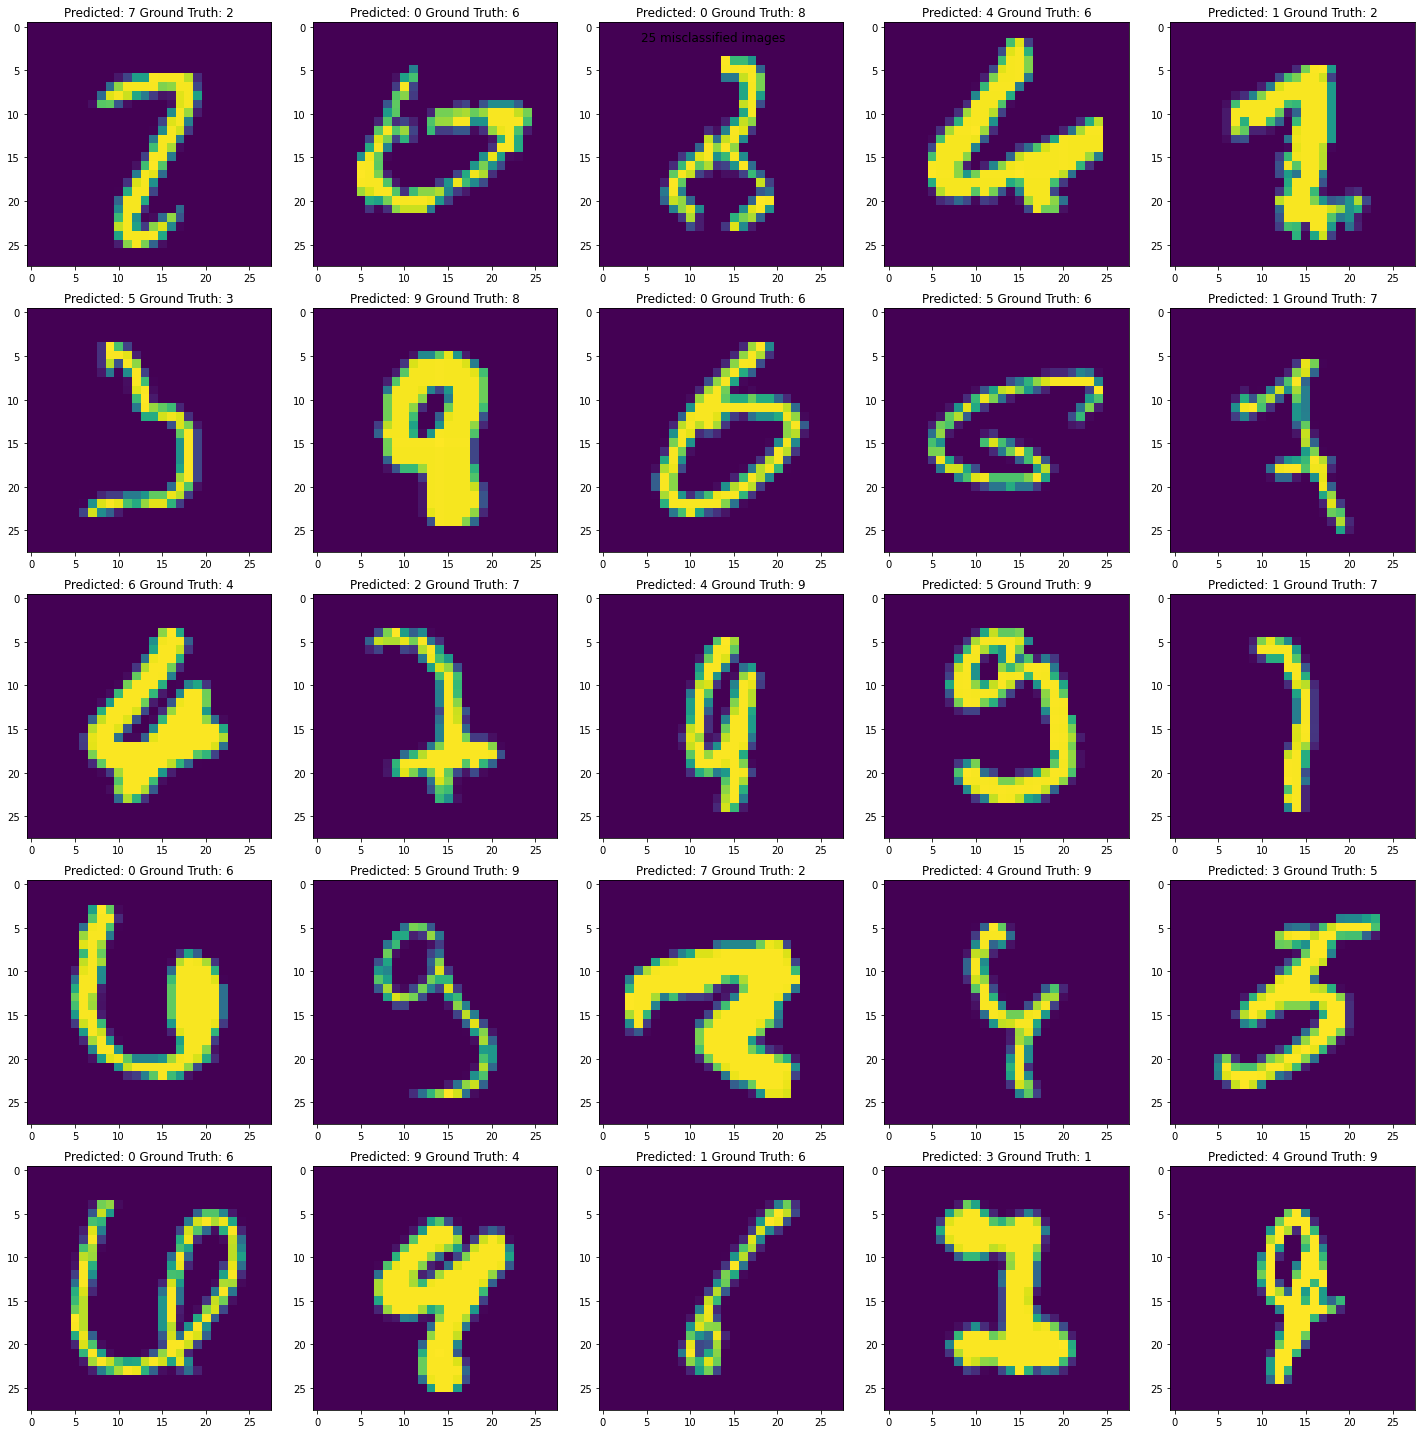

In [0]:
#use the model to predict the test images
y_pred = model.predict(testX)
result=[0]*10000
#form a subplot of 5X5 images with each figure of 20X20
fig, ax = plt.subplots(5, 5, figsize = (20, 20))
fig.tight_layout()
#give title to sub plot
fig.suptitle('25 misclassified images')
#find the predicted value and store it in a list
for i in range(10000):
  for j in range(10):
    if(np.round_(y_pred[i][j])-1 == 0):
      result[i]=j
      

layer_output= []
count,i = 0,0
x,y=0,0
#iterate over all 10000 images until 25 images are printed
while (i < 10000 and count<25):
  #if the prediction is not equal to actual
  if(testy[i][result[i]]==0):
    #show the image
    ax[x,y].imshow(imagefeatures[i])
    ax[x,y].set_title('Predicted: %d Ground Truth: %d' %(result[i],y_test[i]))
    if(y >= 4):
      y=0
      x+=1
    else:
      y+=1      
    count=count+1
  i+=1